In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1175)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1175)
lat_lngs = zip(lats, lngs)
lat_lngs

# Unpacking: Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

503

In [14]:
# Import the requests library.
import requests as req

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [15]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = req.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
       
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | abomey-calavi
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | hohhot
Processing Record 7 of Set 1 | pangnirtung
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | luxor
Processing Record 10 of Set 1 | san carlos de bariloche
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | champerico
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | meyungs
City not found. Skipping...
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | kudahuvadhoo
Processi

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,79.21,72,20,20.71,ZA,2024-01-09 14:37:12
1,Abomey-Calavi,6.4485,2.3557,89.46,66,20,9.22,BJ,2024-01-09 14:37:59
2,Bluff,-46.6000,168.3333,52.81,85,100,12.59,NZ,2024-01-09 14:37:59
3,Mataura,-46.1927,168.8643,52.48,91,100,5.50,NZ,2024-01-09 14:37:59
4,Hilo,19.7297,-155.0900,74.93,84,0,12.66,US,2024-01-09 14:37:59
5,Hohhot,40.8106,111.6522,1.69,85,0,4.47,CN,2024-01-09 14:37:59
6,Pangnirtung,66.1451,-65.7125,-11.20,77,75,4.61,CA,2024-01-09 14:37:59
7,Nanortalik,60.1432,-45.2371,34.63,97,94,9.64,GL,2024-01-09 14:37:59
8,Luxor,25.6989,32.6421,76.59,18,100,11.21,EG,2024-01-09 14:37:59
9,San Carlos De Bariloche,-41.1456,-71.3082,55.15,44,20,23.02,AR,2024-01-09 14:38:00


In [40]:
# Reorder the columns to City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [41]:
# Create the output file (CSV).
output_data_file = "/Users/miracleonyeoziri/Documents/Bootcamp Materials/Module 6/weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

Creating a series of scatter plots for Max Temp, Humidity, Cloudiness, and Wind Speed against the latitude for all the cities.

In [42]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

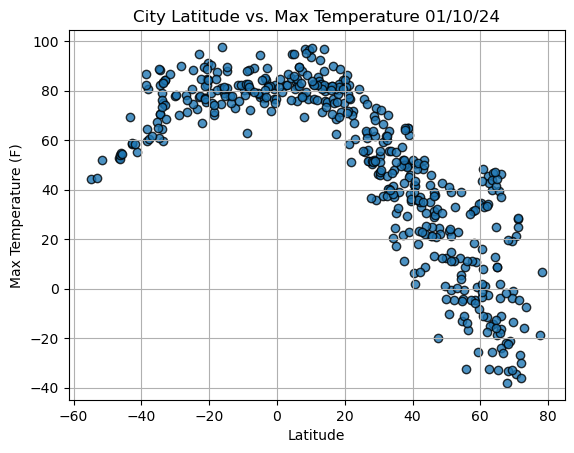

In [43]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("/Users/miracleonyeoziri/Documents/Bootcamp Materials/Module 6/weather_data/Fig1.png")

# Show plot.
plt.show()

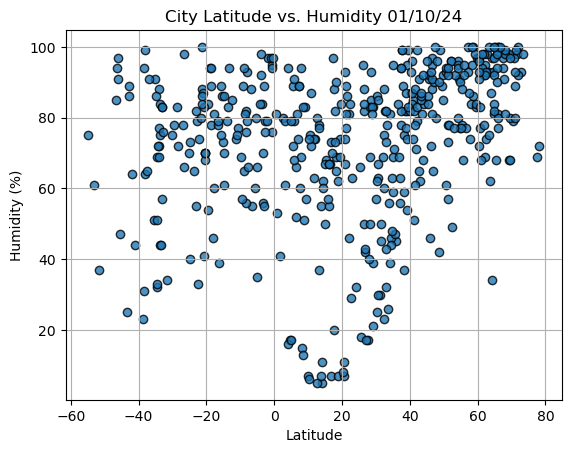

In [44]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("/Users/miracleonyeoziri/Documents/Bootcamp Materials/Module 6/weather_data/Fig2.png")

# Show plot.
plt.show()

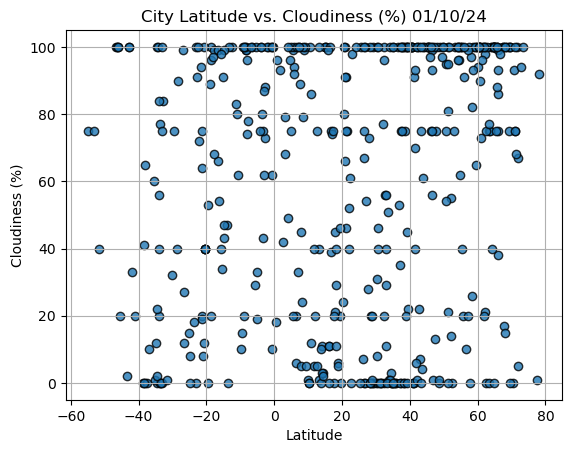

In [45]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("/Users/miracleonyeoziri/Documents/Bootcamp Materials/Module 6/weather_data/Fig3.png")

# Show plot.
plt.show()


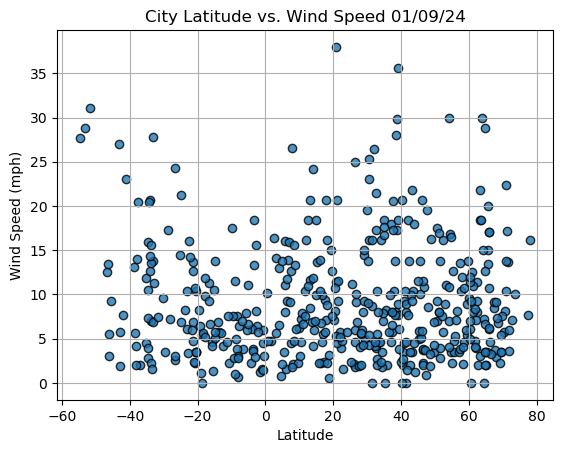

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("/Users/miracleonyeoziri/Documents/Bootcamp Materials/Module 6/weather_data/Fig4.png")

# Show plot.
plt.show()

Creating a Linear Regression Function

In [46]:
# Import linregress
from scipy.stats import linregress

In [47]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
   
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
  
   # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


Testing loc method

In [48]:
index13 = city_data_df.loc[13]
index13

City                     Souillac
Country                        MU
Date          2024-01-09 14:38:00
Lat                      -20.5167
Lng                       57.5167
Max Temp                    84.58
Humidity                       70
Cloudiness                     40
Wind Speed                   3.44
Name: 13, dtype: object

In [50]:
city_data_df["Lat"] >= 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Abomey-Calavi,BJ,2024-01-09 14:37:59,6.4485,2.3557,89.46,66,20,9.22
4,Hilo,US,2024-01-09 14:37:59,19.7297,-155.0900,74.93,84,0,12.66
5,Hohhot,CN,2024-01-09 14:37:59,40.8106,111.6522,1.69,85,0,4.47
6,Pangnirtung,CA,2024-01-09 14:37:59,66.1451,-65.7125,-11.20,77,75,4.61
7,Nanortalik,GL,2024-01-09 14:37:59,60.1432,-45.2371,34.63,97,94,9.64


Finding Correlation Between Latitude and Maximum Temperature for Northern & Southern Hemisphere

In [52]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

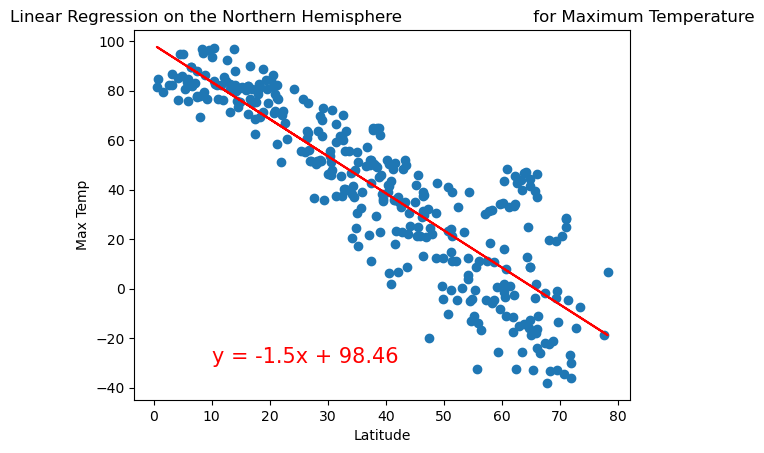

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-30))

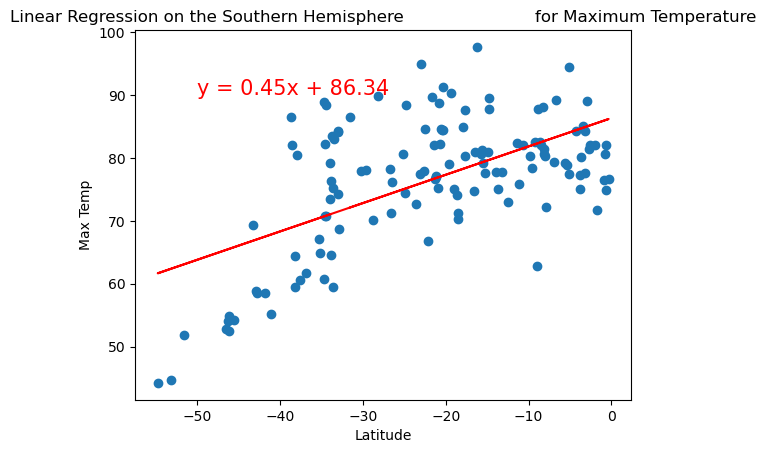

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

Finding Correlation Between Latitude and Percent Humidity for Northern & Southern Hemisphere

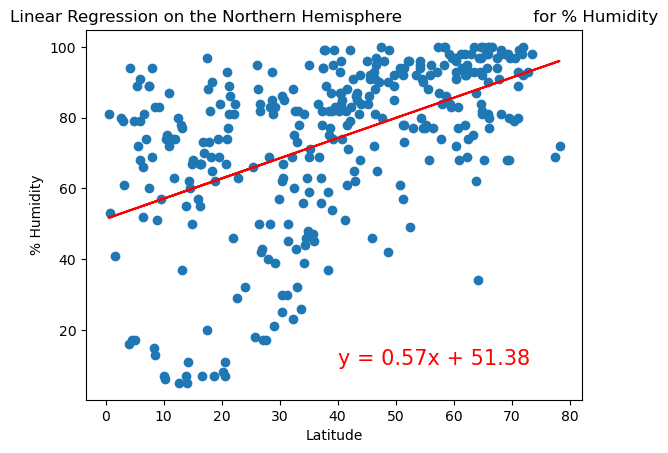

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

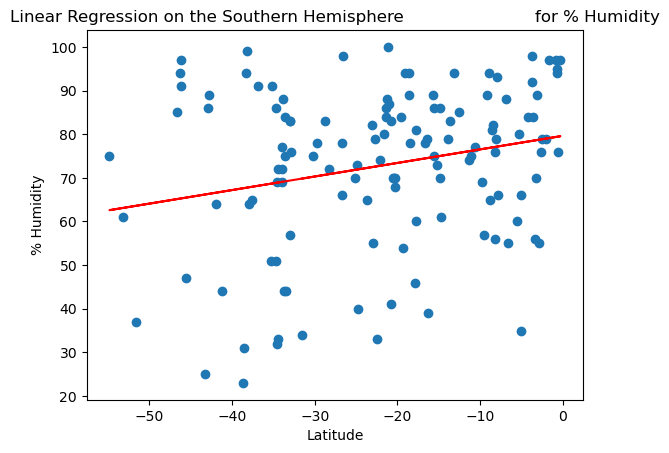

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

Finding Correlation Between Latitude and Percent Cloudiness for Northern & Southern Hemisphere

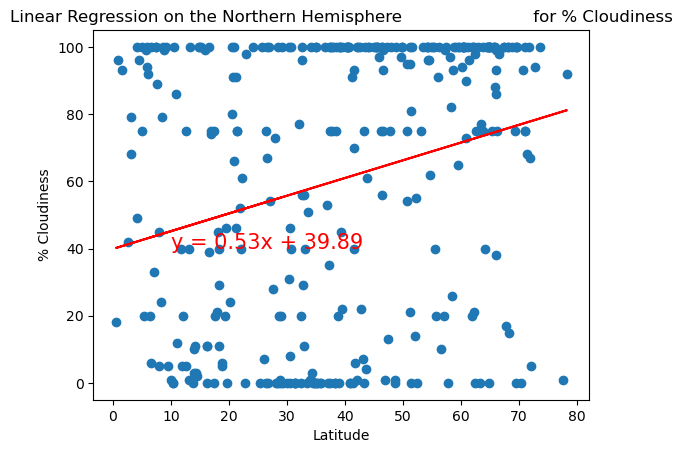

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,40))

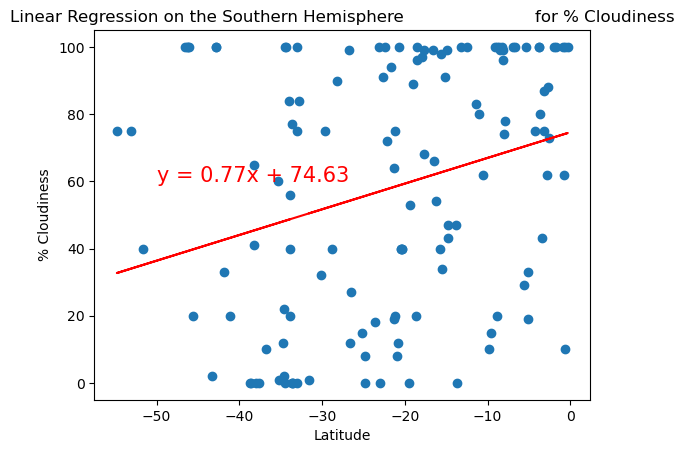

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

Finding Correlation Between Latitude and Wind Speed for Northern & Southern Hemisphere

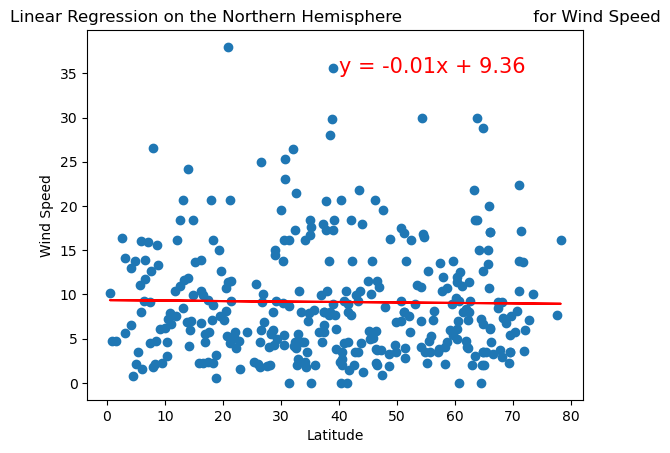

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

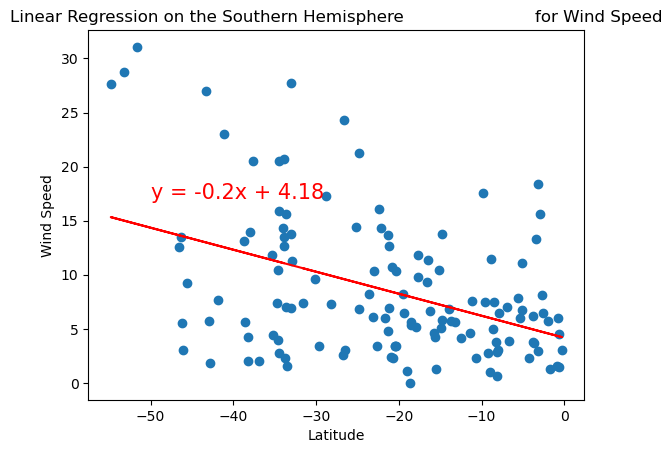

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,17))